# 당뇨병 데이터 셋

- #### feature 어떤것이 가장 영향이 가는지
- #### test_size = 0.1
- #### linearRegression vs DecisionTreeRegressor
- #### Model 성능 , MSE

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    

In [141]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['Target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


- 어떤 feature가 가장 관계가 있을지 알아보기

In [142]:
features = df.columns[:-1]
features

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

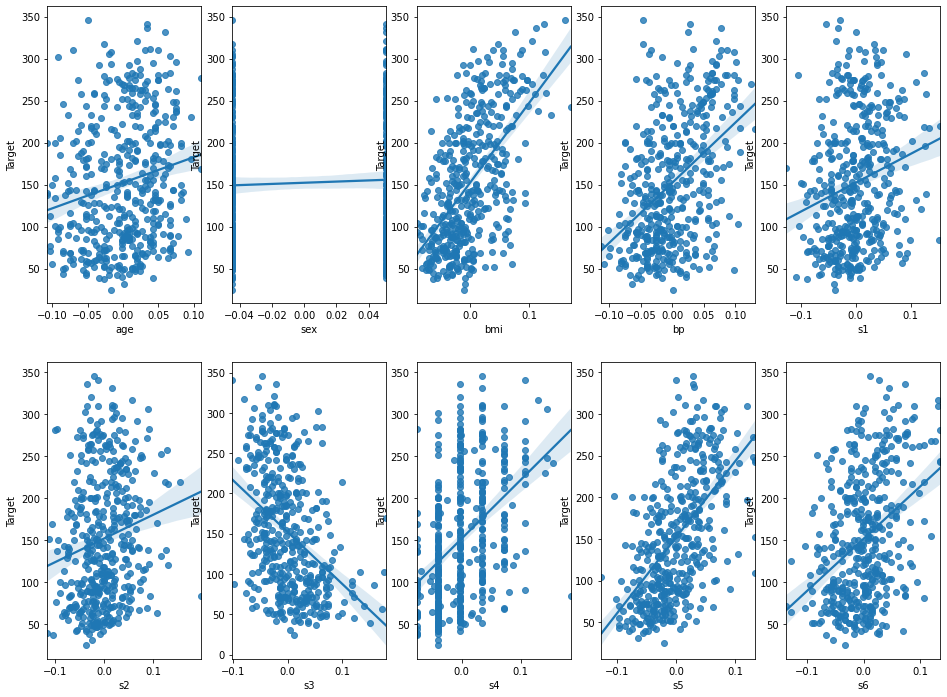

In [143]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,12))
for i, feature in enumerate(features):
    row, col = i//5, i%5 
    sns.regplot(x=feature, y='Target', data=df, ax=axs[row][col])




In [144]:
y = diabetes.target
X = df['age'].values.reshape(-1,1)
X.shape, y.shape

((442, 1), (442,))

In [145]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.03530218264671636

In [146]:
y = diabetes.target
for feature in features:
    X = df[feature].values.reshape(-1,1)
    lr.fit(X,y)
    r2 = lr.score(X,y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


# LinearRegression

# test_size = 0.1 일 때 성능 확인

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [148]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [149]:
pred = lr.predict(X_test)
pred

array([156.03121644, 185.70049526, 162.86384045, 162.54544148,
        78.51849397,  60.6006943 , 175.198247  , 176.7708708 ,
       131.42519735,  88.0537722 , 182.06745271, 125.38694592,
       122.94584881, 175.88337484, 165.04366099, 122.46227623,
       154.00789511, 156.28760568, 163.873603  , 190.61471428,
        81.91824922, 149.28474513, 168.78043889,  52.665137  ,
       253.98654186, 253.16663718, 142.5383034 , 201.95489834,
       125.09884927, 155.64491829, 168.33251496, 111.73916649,
       141.34776468, 159.39865731, 129.45826426, 122.49486964,
       155.00302033, 204.71273072, 175.97337738, 231.52683591,
       231.65409045, 186.87966013, 160.36515649, 125.57517593,
        89.00504061])

In [150]:
lr.score(X_test, y_test)

0.4558401786089106

In [151]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.4558401786089106

In [152]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse

2370.1978745563165

In [153]:
# Weight
lr.coef_

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

In [154]:
# bias
lr.intercept_

151.67372554450927

In [155]:
for i in range(5):
    pred = np.dot(lr.coef_, diabetes.data[i]) + lr.intercept_
    print(f'예측값 : {pred:.2f}, 실제값 : {diabetes.target[i]}') 
pred

예측값 : 204.71, 실제값 : 151.0
예측값 : 68.56, 실제값 : 75.0
예측값 : 175.97, 실제값 : 141.0
예측값 : 167.58, 실제값 : 206.0
예측값 : 126.43, 실제값 : 135.0


126.43145318244555

In [156]:
for i in range(5):
    column = diabetes.target[i]
    pred = lr.predict(diabetes.data[i].reshape(1,-1))[0]
    print(f'예측값 : {pred:.2f}, 실제값 : {diabetes.target[i]}')

예측값 : 204.71, 실제값 : 151.0
예측값 : 68.56, 실제값 : 75.0
예측값 : 175.97, 실제값 : 141.0
예측값 : 167.58, 실제값 : 206.0
예측값 : 126.43, 실제값 : 135.0


# DecisionTreeRegressor

In [157]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((397, 10), (45, 10), (397,), (45,))

In [158]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train1,y_train1)

DecisionTreeRegressor()

In [159]:
pred_dt = dtr.predict(X_test1)
pred_dt

array([178., 145., 200., 128., 178.,  47., 168., 145., 118., 214.,  55.,
       174., 113., 210., 181., 200.,  52., 150., 197., 235., 152.,  42.,
        90.,  71., 258., 274., 168.,  52., 182., 151.,  90., 168., 109.,
        48., 200.,  71., 136., 281.,  78., 279., 272., 293., 109., 103.,
        75.])

In [160]:
dtr.score(X_test1,y_test1)

-0.6859536233251129

In [161]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test1, pred_dt)
mse1

7343.511111111111

In [162]:
for i in range(5):
    column = diabetes.target[i]
    pred1 = dtr.predict(diabetes.data[i].reshape(1,-1))[0]
    print(f'예측값 : {pred1:.2f}, 실제값 : {diabetes.target[i]}')

예측값 : 281.00, 실제값 : 151.0
예측값 : 75.00, 실제값 : 75.0
예측값 : 78.00, 실제값 : 141.0
예측값 : 206.00, 실제값 : 206.0
예측값 : 135.00, 실제값 : 135.0
